<a href="https://colab.research.google.com/github/M-Arashi/DataMining-Python/blob/main/Advanced_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main reference

## Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

Diabetes Dataset reading

In [ ]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

In [ ]:
# Upload data directly from GitHub: We need pandas for this purpose
# url = 'https://raw.githubusercontent.com/M-Arashi/DataMining-Python/master/diabetes.csv'
# Load the dataset using Pandas
# df=pd.read_csv(url)

In [ ]:
col_names = [ 'pregnant' , 'glucose' , 'bp' , 'skin' , 'insulin' , 'bmi' , 'pedigree' , 'age', 'label' ]
data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
x=data.iloc[:, :-1]
y=data['Outcome']

Train & Test Splitting

In [ ]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size=0.2 , random_state=5)
display (x_train . shape , y_train . shape , x_test . shape , y_test . shape)

In [ ]:
model= DecisionTreeClassifier (criterion= 'entropy' , random_state=5)
model.fit(x_train , y_train)
y_pred=model.predict (x_test)
print('y_pred:' , y_pred)

Evaluation Metrics

In [ ]:
conf_mat=metrics.confusion_matrix (y_test , y_pred)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')

In [ ]:
conf_mat=pd.crosstab(y_test , y_pred , rownames= [ 'Actual' ], colnames= [ 'Predicted' ])
sn.heatmap(conf_mat , annot=True)

## Random Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv('Salaries.csv')
print(df)

In [ ]:
df.info()

In [ ]:
X = df.iloc[:,1:2].values#features
y = df.iloc[:,2].values# Target variable

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)


## Out of Bag Score in RandomForest

Bag score or OOB score is the type of validation technique that is mainly used in bagging algorithms to validate the bagging algorithm. Here a small part of the validation data is taken from the mainstream of the data and the predictions on the particular validation data are done and compared with the other results.

The main advantage that the OOB score offers is that here the validation data is not seen by the bagging algorithm and that is why the results on the OOB score are the true results that indicated the actual performance of the bagging algorithm.

To get the OOB score of the particular Random Forest algorithm, one needs to set the value “True” for the OOB_Score parameter in the algorithm.

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Visualizing a Single Decision Tree from the Random Forest Model

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


## Support Vector Machine

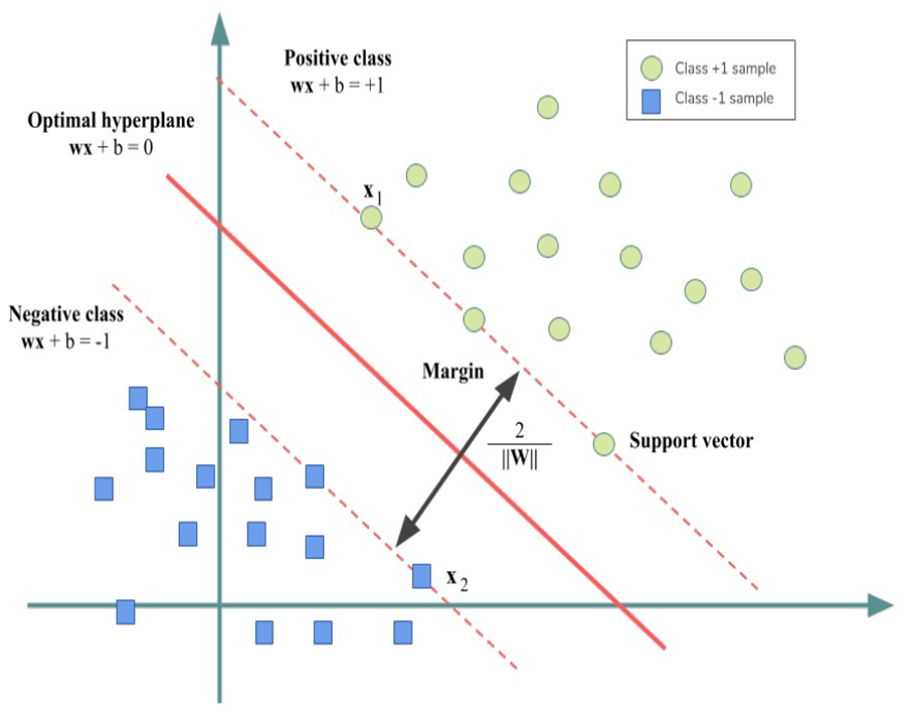

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [ ]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

In [ ]:
x=data.iloc[:, :-1]
y=data['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

<font color='green'>Preprocessing Data with StandardScaler</font>


[Standardization (Z-score normalization) scales the features of a dataset so that they have zero mean and unit variance. This transformation centers the data around the mean and scales it by the standard deviation. It does not enforce a specific range for the transformed values. Normalization, on the other hand, scales the features to a specific range, often between 0 and 1 or -1 and 1. It is achieved by dividing each value by the maximum value in the feature range or by applying other normalization techniques.]()



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Model Fitting

In [ ]:
model= SVC(kernel='rbf',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

In [ ]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - rbf ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))


In [ ]:
y_pred=model.predict(x_test)
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

Fitting the Model (SVM) using 'Linear' kernel

In [ ]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - linear ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

## K Nearest Neighbors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [ ]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

Cloning into 'DataMining-Python'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 73 (delta 6), reused 0 (delta 0), pack-reused 52
Receiving objects: 100% (73/73), 4.77 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/DataMining-Python


In [ ]:
data = pd.read_csv('Breast Cancer Detection Classification Master.csv')
print(data.shape)
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
display(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

Preprocessing Data with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Training the Model using KNN (minkoski)

In [ ]:
results=[]
for i in [1,2,3,4,5]:
  model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  Accuracy_score=metrics.accuracy_score(y_test, y_pred)
  results.append(Accuracy_score)

print('KNN [ minkowski ]')
print('for n_neighbor=5 : ')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : ', conf_mat)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))
print(results)


Evaluation Metrics

In [ ]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [ minkowski, neighbor=5 ]')

In [ ]:
models = pd.DataFrame({'n_neighbors': ['1', '2','3','4','5'], 'Accuracy Score': [results[0],results[1],results[2],results[3],results[4]]})
models.sort_values(by='Accuracy Score')
print(models.to_string(index=False))

## Naive Bayes

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


Read

https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python


## K Means Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

Cloning into 'DataMining-Python'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 76 (delta 7), reused 0 (delta 0), pack-reused 52
Receiving objects: 100% (76/76), 4.77 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/DataMining-Python/DataMining-Python


In [ ]:
data = pd.read_csv('Mall_Customers.csv')
print(data)

In [ ]:
x=data.iloc[:,[2,4]].values

Number of Clusters via Elbow Method

In [ ]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=21)
  model.fit(x)
  wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters:')
plt.ylabel('WCSS Value')
plt.show()

K-Means Clustering Training on Training set

In [ ]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
print("y_means:\n\n",y_means)

Scattering the Clusters

In [ ]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta', label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue', label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='orange', label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan', label='cluster4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_ [:,1],s=200,c='black', label='centerids')
plt.title('cluster of amazon users')
plt.xlabel('age')
plt.ylabel('purchase rating')
plt.legend()
plt.show()